In [ ]:
import shutil
import os
import random
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/Dataset.zip -d /content/Dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Dataset/Dataset/Psoriasis/t-Psoriasis-Chronic-Plaque-109.jpg  
  inflating: /content/Dataset/__MACOSX/Dataset/Psoriasis/._t-Psoriasis-Chronic-Plaque-109.jpg  
  inflating: /content/Dataset/Dataset/Psoriasis/t-Lichen-Sclerosus-Skin-107.jpg  
  inflating: /content/Dataset/__MACOSX/Dataset/Psoriasis/._t-Lichen-Sclerosus-Skin-107.jpg  
  inflating: /content/Dataset/Dataset/Psoriasis/t-seborrheic-dermatitis-124.jpg  
  inflating: /content/Dataset/__MACOSX/Dataset/Psoriasis/._t-seborrheic-dermatitis-124.jpg  
  inflating: /content/Dataset/Dataset/Psoriasis/t-Psoriasis-Hand-3.jpg  
  inflating: /content/Dataset/__MACOSX/Dataset/Psoriasis/._t-Psoriasis-Hand-3.jpg  
  inflating: /content/Dataset/Dataset/Psoriasis/t-psoriasis-erythrodermic-37.jpg  
  inflating: /content/Dataset/__MACOSX/Dataset/Psoriasis/._t-psoriasis-erythrodermic-37.jpg  
  inflating: /content/Dataset/Dataset/Psoriasis/t-psoriasis-palms-soles-113.jpg  
  

In [ ]:
src_path = '/content/Dataset/Dataset'
dest_path = '/content/Dataset'

for folder_name in os.listdir(src_path):
    src_folder = os.path.join(src_path, folder_name)
    dest_folder = os.path.join(dest_path, folder_name)

    if not folder_name.startswith('.'):
        shutil.move(src_folder, dest_folder)

shutil.rmtree(src_path)

macosx_path = '/content/Dataset/__MACOSX'
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)

print('Folder structure cleaned successfully!')

Folder structure cleaned successfully!


In [ ]:
!zip -r /content/Dataset_Cleaned.zip /content/Dataset

!cp /content/Dataset_Cleaned.zip /content/drive/MyDrive/

Streaming output truncated to the last 5000 lines.
  adding: content/Dataset/Melanocytic Nevi/ISIC_0000348.jpg (deflated 1%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0015160_downsampled.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0027484.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0029777.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0029521.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0032285.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0000365.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0033058.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0027273.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0024557.jpg (deflated 0%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0000235.jpg (deflated 3%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0000010.jpg (deflated 7%)
  adding: content/Dataset/Melanocytic Nevi/ISIC_0

In [ ]:
dataset_path = '/content/Dataset'

rename_map = {
    'Eczema': 'eczema',
    'Melanocytic Nevi': 'nv',
    'Melanoma': 'melanoma',
    'Psoriasis': 'psoriasis',
    'Tinea Ringworm': 'ringworm'
}

# rename
for old_name, new_name in rename_map.items():
    old_path = os.path.join(dataset_path, old_name)
    new_path = os.path.join(dataset_path, new_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)

print('Folder names updated successfully!')

Folder names updated successfully!


In [ ]:
ORIG_DATASET_DIR = '/content/Dataset'
BASE_OUTPUT = '/content/Dataset_Split'

# split ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1

# base output folders
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(ORIG_DATASET_DIR):
        os.makedirs(os.path.join(BASE_OUTPUT, split, class_name), exist_ok=True)

for class_name in os.listdir(ORIG_DATASET_DIR):
    class_path = os.path.join(ORIG_DATASET_DIR, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    train_size = int(len(images) * TRAIN_RATIO)
    val_size = int(len(images) * VAL_RATIO)

    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    for img_name in train_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(BASE_OUTPUT, 'train', class_name, img_name))

    for img_name in val_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(BASE_OUTPUT, 'val', class_name, img_name))

    for img_name in test_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(BASE_OUTPUT, 'test', class_name, img_name))

print("Dataset split into train, val, and test folders successfully!")

Dataset split into train, val, and test folders successfully!


In [ ]:
print("Train classes:", os.listdir('/content/Dataset_Split/train'))
print("Validation classes:", os.listdir('/content/Dataset_Split/val'))
print("Test classes:", os.listdir('/content/Dataset_Split/test'))

Train classes: ['melanoma', 'ringworm', 'psoriasis', 'nv', 'eczema']
Validation classes: ['melanoma', 'ringworm', 'psoriasis', 'nv', 'eczema']
Test classes: ['melanoma', 'ringworm', 'psoriasis', 'nv', 'eczema']


Found 11579 images belonging to 5 classes.
Found 3308 images belonging to 5 classes.
Found 1657 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.3351 - loss: 1.6785
Epoch 1: val_accuracy improved from -inf to 0.48186, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 237s 611ms/step - accuracy: 0.3352 - loss: 1.6783 - val_accuracy: 0.4819 - val_loss: 1.3938
Epoch 2/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.4485 - loss: 1.4809
Epoch 2: val_accuracy did not improve from 0.48186
362/362 ━━━━━━━━━━━━━━━━━━━━ 202s 557ms/step - accuracy: 0.4485 - loss: 1.4809 - val_accuracy: 0.4819 - val_loss: 1.3867
Epoch 3/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.4699 - loss: 1.4477
Epoch 3: val_accuracy did not improve from 0.48186
362/362 ━━━━━━━━━━━━━━━━━━━━ 194s 536ms/step - accuracy: 0.4699 - loss: 1.4476 - val_accuracy: 0.4819 - val_loss: 1.3815
Epoch 4/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.4743 - loss: 1.4267
Epoch 4: val_accuracy improved from 0.48186 to 0.48216, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 199s 551ms/step - accuracy: 0.4743 - loss: 1.4266 - val_accuracy: 0.4822 - val_loss: 1.3778
Epoch 5/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.4751 - loss: 1.4180
Epoch 5: val_accuracy improved from 0.48216 to 0.48277, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 196s 541ms/step - accuracy: 0.4751 - loss: 1.4179 - val_accuracy: 0.4828 - val_loss: 1.3727
Epoch 6/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.4731 - loss: 1.4197
Epoch 6: val_accuracy did not improve from 0.48277
362/362 ━━━━━━━━━━━━━━━━━━━━ 195s 537ms/step - accuracy: 0.4731 - loss: 1.4196 - val_accuracy: 0.4828 - val_loss: 1.3688
Epoch 7/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4785 - loss: 1.3946
Epoch 7: val_accuracy did not improve from 0.48277
362/362 ━━━━━━━━━━━━━━━━━━━━ 193s 533ms/step - accuracy: 0.4785 - loss: 1.3946 - val_accuracy: 0.4825 - val_loss: 1.3660
Epoch 8/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4706 - loss: 1.3999
Epoch 8: val_accuracy improved from 0.48277 to 0.48307, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 195s 539ms/step - accuracy: 0.4706 - loss: 1.3999 - val_accuracy: 0.4831 - val_loss: 1.3611
Epoch 9/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.4735 - loss: 1.3925
Epoch 9: val_accuracy improved from 0.48307 to 0.48337, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 203s 543ms/step - accuracy: 0.4735 - loss: 1.3925 - val_accuracy: 0.4834 - val_loss: 1.3584
Epoch 10/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.4801 - loss: 1.3848
Epoch 10: val_accuracy did not improve from 0.48337
362/362 ━━━━━━━━━━━━━━━━━━━━ 200s 539ms/step - accuracy: 0.4801 - loss: 1.3848 - val_accuracy: 0.4831 - val_loss: 1.3550
Epoch 11/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4765 - loss: 1.3800
Epoch 11: val_accuracy improved from 0.48337 to 0.48368, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 201s 536ms/step - accuracy: 0.4765 - loss: 1.3800 - val_accuracy: 0.4837 - val_loss: 1.3518
Epoch 12/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.4857 - loss: 1.3696
Epoch 12: val_accuracy improved from 0.48368 to 0.48398, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 203s 540ms/step - accuracy: 0.4857 - loss: 1.3696 - val_accuracy: 0.4840 - val_loss: 1.3466
Epoch 13/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.4803 - loss: 1.3705
Epoch 13: val_accuracy improved from 0.48398 to 0.48428, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 194s 536ms/step - accuracy: 0.4803 - loss: 1.3705 - val_accuracy: 0.4843 - val_loss: 1.3454
Epoch 14/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.4810 - loss: 1.3698
Epoch 14: val_accuracy improved from 0.48428 to 0.48458, saving model to /content/drive/MyDrive/best_model_resnet50.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 197s 544ms/step - accuracy: 0.4810 - loss: 1.3698 - val_accuracy: 0.4846 - val_loss: 1.3411
Epoch 15/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4819 - loss: 1.3625
Epoch 15: val_accuracy did not improve from 0.48458
362/362 ━━━━━━━━━━━━━━━━━━━━ 194s 535ms/step - accuracy: 0.4820 - loss: 1.3625 - val_accuracy: 0.4846 - val_loss: 1.3402
Epoch 16/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4856 - loss: 1.3599
Epoch 16: val_accuracy did not improve from 0.48458
362/362 ━━━━━━━━━━━━━━━━━━━━ 193s 534ms/step - accuracy: 0.4856 - loss: 1.3599 - val_accuracy: 0.4840 - val_loss: 1.3348
Epoch 17/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4863 - loss: 1.3532
Epoch 17: val_accuracy did not improve from 0.48458
362/362 ━━━━━━━━━━━━━━━━━━━━ 193s 534ms/step - accuracy: 0.4863 - loss: 1.3532 - val_accuracy: 0.4840 - val_loss: 1.3316
Epoch 18/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.4842 - loss: 1.3511
Epoc

362/362 ━━━━━━━━━━━━━━━━━━━━ 194s 537ms/step - accuracy: 0.5005 - loss: 1.3279 - val_accuracy: 0.4873 - val_loss: 1.3185
Epoch 24/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.4931 - loss: 1.3273
Epoch 24: val_accuracy did not improve from 0.48730
362/362 ━━━━━━━━━━━━━━━━━━━━ 201s 534ms/step - accuracy: 0.4931 - loss: 1.3273 - val_accuracy: 0.4858 - val_loss: 1.3148
Epoch 25/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.4894 - loss: 1.3340
Epoch 25: val_accuracy did not improve from 0.48730
362/362 ━━━━━━━━━━━━━━━━━━━━ 192s 529ms/step - accuracy: 0.4894 - loss: 1.3340 - val_accuracy: 0.4855 - val_loss: 1.3106
Epoch 26/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.4867 - loss: 1.3400
Epoch 26: val_accuracy did not improve from 0.48730
362/362 ━━━━━━━━━━━━━━━━━━━━ 195s 540ms/step - accuracy: 0.4867 - loss: 1.3400 - val_accuracy: 0.4858 - val_loss: 1.3100
Epoch 27/30
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.4876 - loss: 1.3338
Epoc

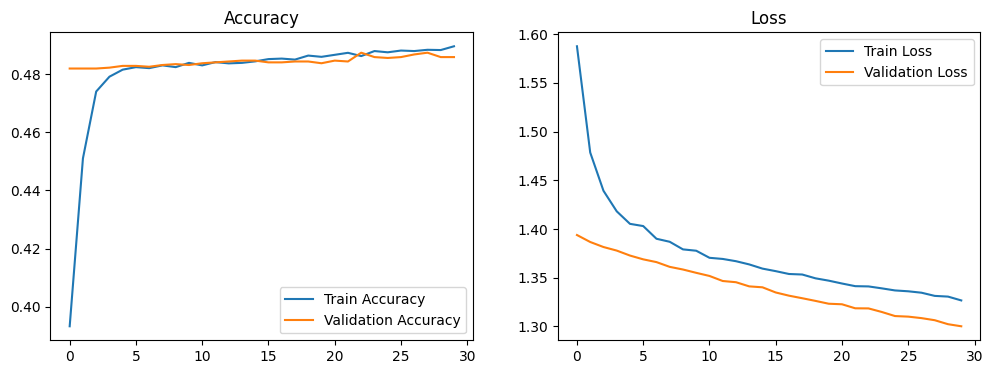

1657/1657 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report
              precision    recall  f1-score   support

      eczema       1.00      0.01      0.01       169
    melanoma       0.45      0.04      0.08       314
          nv       0.49      0.99      0.65       797
   psoriasis       0.00      0.00      0.00       206
    ringworm       0.00      0.00      0.00       171

    accuracy                           0.48      1657
   macro avg       0.39      0.21      0.15      1657
weighted avg       0.42      0.48      0.33      1657

Confusion Matrix
[[  1   1 162   5   0]
 [  0  13 301   0   0]
 [  0  10 786   1   0]
 [  0   4 202   0   0]
 [  0   1 166   4   0]]
Final model saved successfully.


In [ ]:
# config
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 5

DATA_DIR = '/content/Dataset_Split'

# augmentation
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale=1./255
)

train_generator = datagen_train.flow_from_directory(
    os.path.join(DATA_DIR, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen_val.flow_from_directory(
    os.path.join(DATA_DIR, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen_val.flow_from_directory(
    os.path.join(DATA_DIR, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# checkpoint setup
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/best_model_resnet50.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

# evaluation
# plot the training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# evaluate on test data
pred = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)
true_class_indices = test_generator.classes

print('Classification Report')
print(classification_report(true_class_indices, predicted_class_indices, target_names=list(test_generator.class_indices.keys())))

print('Confusion Matrix')
print(confusion_matrix(true_class_indices, predicted_class_indices))

# final manual save after training
model.save('/content/drive/MyDrive/experiment1_skin_disease_resnet50_final.h5')
print('Final model saved successfully.')

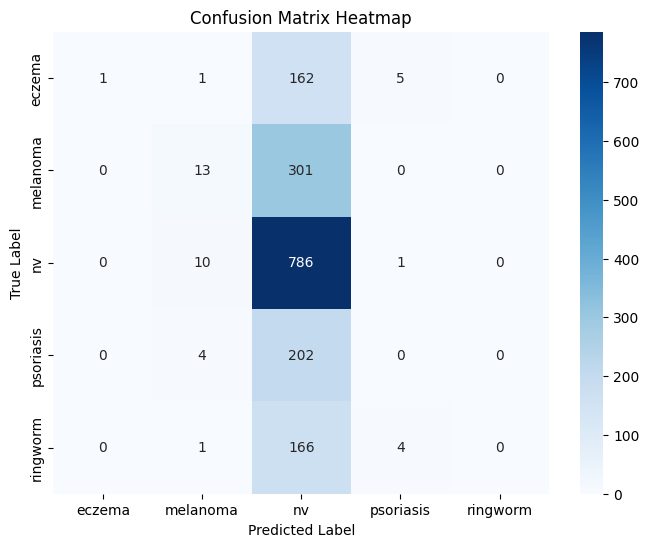

In [ ]:
cm = confusion_matrix(true_class_indices, predicted_class_indices)

class_labels = ['eczema', 'melanoma', 'nv', 'psoriasis', 'ringworm']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Model loaded!
All layers set to trainable!
Model recompiled with small learning rate!
Class weights: {0: np.float64(1.9742540494458654), 1: np.float64(1.0535941765241128), 2: np.float64(0.4150923104499014), 3: np.float64(1.6104311543810848), 4: np.float64(1.944416456759026)}
Epoch 1/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.2981 - loss: 3.6403
Epoch 1: val_accuracy improved from -inf to 0.09976, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 311s 699ms/step - accuracy: 0.2985 - loss: 3.6361 - val_accuracy: 0.0998 - val_loss: 48.5982
Epoch 2/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.6501 - loss: 0.9743
Epoch 2: val_accuracy improved from 0.09976 to 0.13936, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 224s 619ms/step - accuracy: 0.6502 - loss: 0.9742 - val_accuracy: 0.1394 - val_loss: 13.4329
Epoch 3/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7314 - loss: 0.7906
Epoch 3: val_accuracy improved from 0.13936 to 0.72703, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 263s 623ms/step - accuracy: 0.7314 - loss: 0.7906 - val_accuracy: 0.7270 - val_loss: 0.5994
Epoch 4/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.7713 - loss: 0.7122
Epoch 4: val_accuracy improved from 0.72703 to 0.83041, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 230s 634ms/step - accuracy: 0.7714 - loss: 0.7122 - val_accuracy: 0.8304 - val_loss: 0.4074
Epoch 5/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.8110 - loss: 0.6435
Epoch 5: val_accuracy improved from 0.83041 to 0.83404, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 231s 636ms/step - accuracy: 0.8110 - loss: 0.6434 - val_accuracy: 0.8340 - val_loss: 0.4013
Epoch 6/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.8269 - loss: 0.5778
Epoch 6: val_accuracy improved from 0.83404 to 0.85429, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 231s 637ms/step - accuracy: 0.8270 - loss: 0.5777 - val_accuracy: 0.8543 - val_loss: 0.3654
Epoch 7/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.8612 - loss: 0.5081
Epoch 7: val_accuracy improved from 0.85429 to 0.86638, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 234s 645ms/step - accuracy: 0.8612 - loss: 0.5081 - val_accuracy: 0.8664 - val_loss: 0.3365
Epoch 8/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.8785 - loss: 0.4494
Epoch 8: val_accuracy improved from 0.86638 to 0.86729, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 230s 636ms/step - accuracy: 0.8785 - loss: 0.4493 - val_accuracy: 0.8673 - val_loss: 0.3422
Epoch 9/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.8888 - loss: 0.4038
Epoch 9: val_accuracy improved from 0.86729 to 0.87666, saving model to /content/drive/MyDrive/best_model_resnet50_finetuned.h5


362/362 ━━━━━━━━━━━━━━━━━━━━ 229s 633ms/step - accuracy: 0.8888 - loss: 0.4038 - val_accuracy: 0.8767 - val_loss: 0.3365
Epoch 10/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.8943 - loss: 0.3704
Epoch 10: val_accuracy did not improve from 0.87666
362/362 ━━━━━━━━━━━━━━━━━━━━ 251s 603ms/step - accuracy: 0.8943 - loss: 0.3704 - val_accuracy: 0.8667 - val_loss: 0.3601


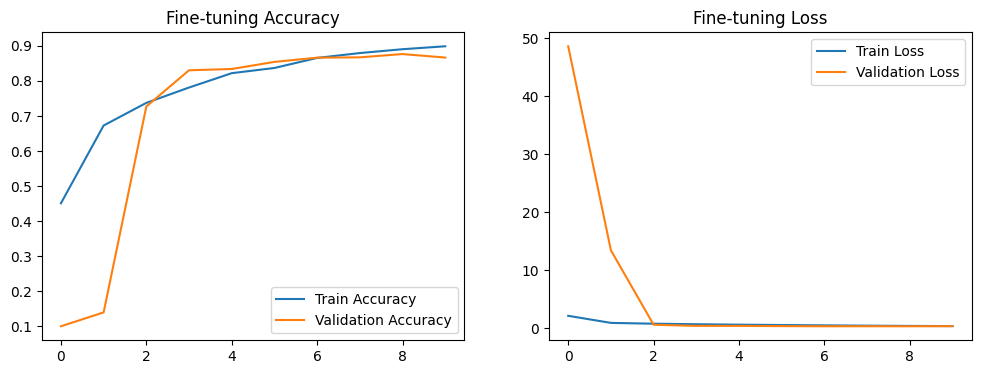

Fine-tuning completed successfully!


In [ ]:

model = load_model('/content/drive/MyDrive/best_model_resnet50.h5')
print("Model loaded!")

# Unfreeze all layers
for layer in model.layers:
    layer.trainable = True

print("All layers set to trainable!")

# recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model recompiled with small learning rate!")

# generates class weights from training generator
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

#checkpoint
checkpoint_finetune = ModelCheckpoint(
    filepath='/content/drive/MyDrive/best_model_resnet50_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# fine tune
fine_tune_epochs = 10
history_finetune = model.fit(
    train_generator,
    epochs=fine_tune_epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_finetune],
    class_weight=class_weights_dict
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Fine-tuning Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Fine-tuning Loss')

plt.show()

print("Fine-tuning completed successfully!")


Fine-tuned model loaded!
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step


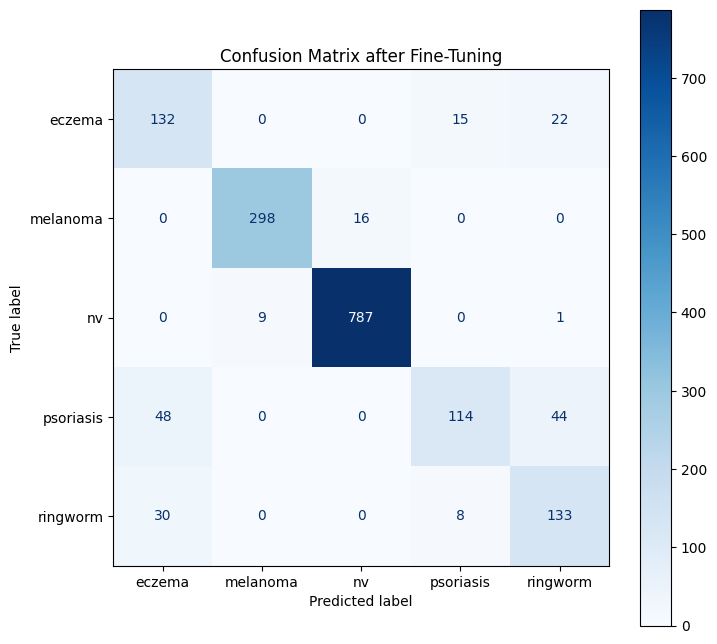

In [ ]:
finetuned_model = load_model('/content/drive/MyDrive/best_model_resnet50_finetuned.h5')
print("Fine-tuned model loaded!")


pred = finetuned_model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)
true_class_indices = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# generate Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_class_indices, predicted_class_indices)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix after Fine-Tuning')
plt.show()